In [2]:
import numpy as np
import pandas as pd

data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


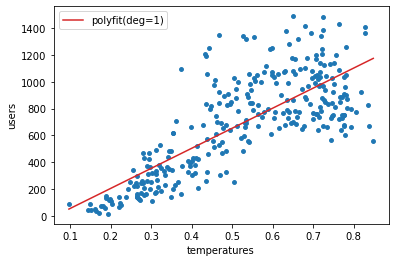

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# linear regerssion using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")
plt.xlabel("temperatures")
plt.ylabel("users")
plt.legend()
plt.show()

In [9]:
# root mean squared error 
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [10]:
# initialisation
lr = 0.7 # learning rate ie steps
a, b = 0, 0
n_steps = 30

In [11]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

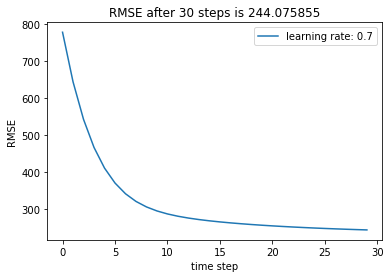

In [12]:
# plot RMSE values to verify the RMSE value decreases at each step
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [13]:
# verify a, b values are optimal by computing OLS

a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# optimal values vs ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient Descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient Descent (a, b)= (1133.56, 98.91)


In [18]:
# increase number of steps to see if improves GD model

# initialisation
lr = 0.7 # learning rate ie steps
a, b = 0, 0
n_steps = 400

In [19]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

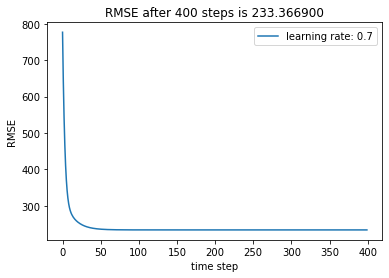

In [20]:
# plot RMSE values to verify the RMSE value decreases at each step
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [21]:
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# optimal values vs ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient Descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient Descent (a, b)= (1495.60, -94.61)


After 400 steps RMSE is around 233 and parameters equal to ones from polyfit function

CONVERGENCE

In [22]:
# increasing steps doesnt always converge to optimal solution 
# incraesing learning rate in this example increases error after each step

# initialisation
lr = 0.8 # learning rate ie steps
a, b = 0, 0
n_steps = 400

In [23]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

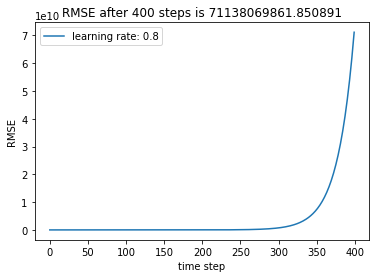

In [24]:
# plot RMSE values to verify the RMSE value decreases at each step
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

ISSUE WITH GRADIENT

In [25]:
# create new arrays using temp in Celsius format
x = 47 * data_df.temp.values - 8 
y = data_df.users.values

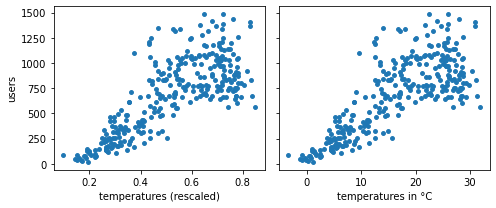

In [26]:
# Compare the two version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
ax1.scatter(data_df.temp, y, s=15)
ax1.set_xlabel("temperatures (rescaled)")
ax1.set_ylabel("users")
ax2.scatter(x, y, s=15)
ax2.set_xlabel("temperatures in °C")
plt.tight_layout()
plt.show()

In [27]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Root mean square error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))


# Gradient descent
log_rmse = []
for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log RMSE score
    log_rmse.append(rmse(y, y_pred))

C:\Users\Rob\anaconda3\envs\adsml\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\Rob\AppData\Local\Temp/ipykernel_1456/2573406756.py:8: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean(np.square(y - y_pred)))
C:\Users\Rob\AppData\Local\Temp/ipykernel_1456/2573406756.py:17: RuntimeWarning: overflow encountered in multiply
  a_grad = -2 * np.mean(x * error)
C:\Users\Rob\AppData\Local\Temp/ipykernel_1456/2573406756.py:15: RuntimeWarning: invalid value encountered in add
  y_pred = a * x + b


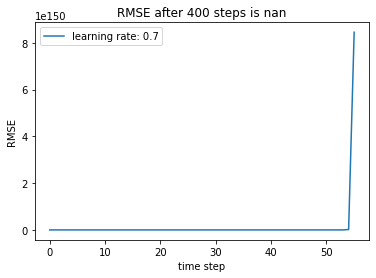

In [28]:
# above error as GD diverged to too large a number 

# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [29]:
# visualise 

# Create x/y arrays
x = data_df.temp.values
y = data_df.users.values

In [30]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

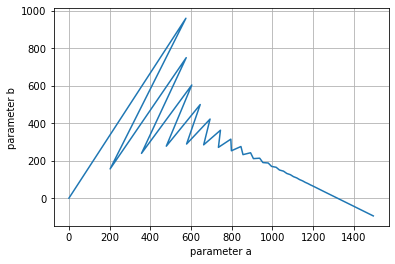

In [31]:
# Visualize steps
plt.plot(log_a, log_b)
plt.grid()
plt.xlabel("parameter a")
plt.ylabel("parameter b")
plt.show()

STANDARDISATION

In [32]:
from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print("Mean:", x_standardized.mean())
print("Standard deviation:", x_standardized.std())

Mean: -7.058371547285764e-17
Standard deviation: 1.0
